In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('Display.max_columns',300)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Store our ID for easy access
Id = test['Id']

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [6]:
df = pd.concat([train,test],keys=['train','test'])

C:\Users\Ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
df

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  \
train 0          856       854          0   NaN             3     1Fam   
      1         1262         0          0   NaN             3     1Fam   
      2          920       866          0   NaN             3     1Fam   
      3          961       756          0   NaN             3     1Fam   
      4         1145      1053          0   NaN             4     1Fam   
...              ...       ...        ...   ...           ...      ...   
test  1454       546       546          0   NaN             3    Twnhs   
      1455       546       546          0   NaN             3   TwnhsE   
      1456      1224         0          0   NaN             4     1Fam   
      1457       970         0          0   NaN             3     1Fam   
      1458       996      1004          0   NaN             3     1Fam   

           BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1  \
train 0          TA           No       706.0         0.0          GLQ   
      1          TA           Gd       978.0         0.0          ALQ   
      2          TA           Mn       486.0         0.0          GLQ   
      3          Gd           No       216.0         0.0          ALQ   
      4          TA           Av       655.0         0.0          GLQ   
...             ...          ...         ...         ...          ...   
test  1454       TA           No         0.0         0.0          Unf   
      1455       TA           No       252.0         0.0          Rec   
      1456       TA           No      1224.0         0.0          ALQ   
      1457       TA           Av       337.0         0.0          GLQ   
      1458       TA           Av       758.0         0.0          LwQ   

           BsmtFinType2  BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF  \
train 0             Unf           1.0           0.0       Gd      150.0   
      1             Unf           0.0           1.0       Gd      284.0   
      2             Unf           1.0           0.0       Gd      434.0   
      3             Unf           1.0           0.0       TA      540.0   
      4             Unf           1.0           0.0       Gd      490.0   
...                 ...           ...           ...      ...        ...   
test  1454          Unf           0.0           0.0       TA      546.0   
      1455          Unf           0.0           0.0       TA      294.0   
      1456          Unf           1.0           0.0       TA        0.0   
      1457          Unf           0.0           1.0       Gd      575.0   
      1458          Unf           0.0           0.0       Gd      238.0   

           CentralAir Condition1 Condition2 Electrical  EnclosedPorch  \
train 0             Y       Norm       Norm      SBrkr              0   
      1             Y      Feedr       Norm      SBrkr              0   
      2             Y       Norm       Norm      SBrkr              0   
      3             Y       Norm       Norm      SBrkr            272   
      4             Y       Norm       Norm      SBrkr              0   
...               ...        ...        ...        ...            ...   
test  1454          Y       Norm       Norm      SBrkr              0   
      1455          Y       Norm       Norm      SBrkr              0   
      1456          Y       Norm       Norm      SBrkr              0   
      1457          Y       Norm       Norm      SBrkr              0   
      1458          Y       Norm       Norm      SBrkr              0   

           ExterCond ExterQual Exterior1st Exterior2nd  Fence FireplaceQu  \
train 0           TA        Gd     VinylSd     VinylSd    NaN         NaN   
      1           TA        TA     MetalSd     MetalSd    NaN          TA   
      2           TA        Gd     VinylSd     VinylSd    NaN          TA   
      3           TA        TA     Wd Sdng     Wd Shng    NaN          Gd   
      4           TA        Gd     VinylSd     VinylSd    NaN          TA   
...   

In [8]:
df.drop(['Id','PoolQC','Fence','MiscFeature','Alley','FireplaceQu','Condition2'],axis=1,inplace = True)

## Handle missing value

In [9]:
df.isnull().sum().tail(10)

SaleType        1
ScreenPorch     0
Street          0
TotRmsAbvGrd    0
TotalBsmtSF     1
Utilities       2
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
dtype: int64

In [10]:
df.nunique().tail(20)

Neighborhood       25
OpenPorchSF       252
OverallCond         9
OverallQual        10
PavedDrive          3
PoolArea           14
RoofMatl            8
RoofStyle           6
SaleCondition       6
SalePrice         663
SaleType            9
ScreenPorch       121
Street              2
TotRmsAbvGrd       14
TotalBsmtSF      1058
Utilities           2
WoodDeckSF        379
YearBuilt         118
YearRemodAdd       61
YrSold              5
dtype: int64

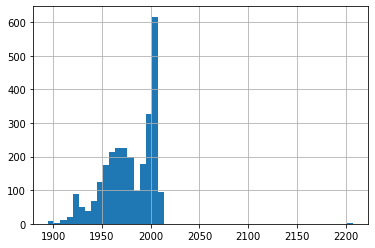

In [11]:
df['GarageYrBlt'].hist(bins=50)

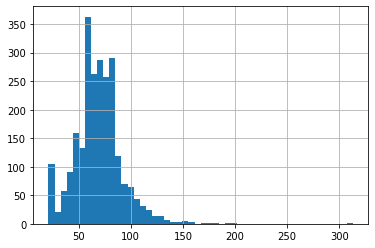

In [12]:
df['LotFrontage'].hist(bins=50)

In [13]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())
df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])

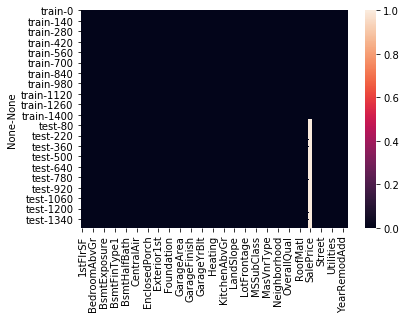

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.isnull().sum().head(40)

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       1
BsmtFinSF2       1
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     2
BsmtHalfBath     2
BsmtQual         0
BsmtUnfSF        1
CentralAir       0
Condition1       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      1
Exterior2nd      1
Fireplaces       0
Foundation       0
FullBath         0
Functional       2
GarageArea       1
GarageCars       1
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
GarageYrBlt      0
GrLivArea        0
HalfBath         0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenAbvGr     0
dtype: int64

In [16]:
df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].median())
df['GarageArea']=df['GarageArea'].fillna(df['GarageArea'].median())
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])
df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['BsmtUnfSF']=df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].median())
df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].median())
df['BsmtFullBath']=df['BsmtFullBath'].fillna(df['BsmtFullBath'].median())
df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median())
df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, (train, 0) to (test, 1458)
Data columns (total 74 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
Fi

In [18]:
df_new = df.loc[pd.IndexSlice[['train'],::]]
y_train = df_new.SalePrice
y_train

train  0       208500.0
       1       181500.0
       2       223500.0
       3       140000.0
       4       250000.0
                 ...   
       1455    175000.0
       1456    210000.0
       1457    266500.0
       1458    142125.0
       1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [19]:
df.drop(['SalePrice'],axis=1,inplace=True)

In [20]:
#df.dropna(inplace=True)

In [21]:
df_num= df[df.select_dtypes(include=np.number).columns]
df_cat= df[df.select_dtypes(include='object').columns]
df_dummy= pd.get_dummies(df_cat,drop_first=True)
data =pd.concat([df_num,df_dummy],axis=1)

In [22]:
data.drop(['BsmtHalfBath','BldgType_2fmCon','Condition1_RRNe','HeatingQC_Po','Neighborhood_Blueste','SaleType_WD',
              'PavedDrive_Y','Neighborhood_BrkSide','HouseStyle_2.5Unf','HeatingQC_Fa','Heating_Grav','Heating_GasA',
              'GarageFinish_Unf','Functional_Maj2','Exterior2nd_Stone','Exterior1st_BrkFace','Electrical_FuseF','OpenPorchSF',
              'BsmtCond_Gd','BsmtFinType1_Rec','BsmtFinType2_GLQ','CentralAir_Y','Condition1_PosA','Condition1_RRNn',
              'Electrical_FuseP','Exterior2nd_Other','Functional_Mod','Heating_GasW','RoofStyle_Gable','RoofStyle_Gambrel',
             'EnclosedPorch','YrSold','ExterQual_Fa','Exterior1st_BrkComm','Exterior2nd_CmentBd','Neighborhood_MeadowV',
         'Neighborhood_Veenker','RoofStyle_Hip', 'SaleCondition_Family','SaleType_ConLw','BsmtFinSF2','BsmtUnfSF',
              'BsmtExposure_Mn','BsmtFinType1_BLQ','Electrical_Mix','ExterCond_Po','Exterior1st_AsphShn',
         'Exterior2nd_Brk Cmn','LandContour_Low','Neighborhood_BrDale','Neighborhood_SawyerW','SaleCondition_Partial',
             'GarageYrBlt','HalfBath','LotFrontage','MiscVal','BsmtFinType1_Unf','Condition1_RRAn','Electrical_SBrkr',
          'Exterior2nd_AsphShn','Heating_Wall','Neighborhood_SWISU','RoofStyle_Mansard','SaleCondition_Alloca',
             'Condition1_Feedr','Exterior1st_Stucco','Exterior2nd_MetalSd','Exterior2nd_Stucco','Exterior2nd_Wd Shng',
          'Foundation_Stone','Functional_Sev','HouseStyle_SLvl','MasVnrType_BrkFace','Neighborhood_IDOTRR','Neighborhood_Timber',
         'PavedDrive_P','PavedDrive_P','SaleType_CWD','SaleType_ConLI','SaleType_Oth','BsmtFullBath','GarageArea','MSSubClass','LowQualFinSF','MoSold','BldgType_Duplex','BsmtCond_TA','BsmtFinType1_LwQ'
          ,'ExterCond_Fa','ExterCond_TA','Exterior1st_CBlock','Exterior1st_MetalSd','Exterior2nd_BrkFace','Exterior2nd_CBlock',
          'Exterior2nd_Plywood','Foundation_CBlock','Foundation_PConc','Foundation_Slab','GarageType_BuiltIn','GarageType_CarPort'
          ,'HeatingQC_TA','HouseStyle_SFoyer','LotConfig_FR3','LotShape_Reg','MasVnrType_None','Neighborhood_CollgCr',
          'Neighborhood_Gilbert','Neighborhood_Somerst','SaleType_Con','Utilities_NoSeWa','FullBath','GrLivArea','YearRemodAdd','ExterCond_Gd','Exterior1st_WdShing','Exterior2nd_HdBoard','Functional_Min1',
         'Functional_Min2','GarageType_Basment','HeatingQC_Gd','LotConfig_Inside','LotShape_IR2','LotShape_IR3',
         'Neighborhood_ClearCr','Neighborhood_NPkVill','Neighborhood_Sawyer','RoofStyle_Shed','SaleCondition_AdjLand',
             'MasVnrArea','BsmtCond_Po','Exterior1st_CemntBd','Exterior1st_ImStucc','Exterior1st_Stone','Exterior2nd_Wd Sdng',
          'Exterior2nd_VinylSd','GarageFinish_RFn','GarageType_Attchd','GarageType_Detchd','HouseStyle_2.5Fin','HouseStyle_2Story',
          'LotConfig_FR2','SaleType_ConLD','HouseStyle_1.5Unf','Exterior1st_VinylSd','Foundation_Wood',
             'Exterior1st_Wd Sdng','Exterior2nd_ImStucc'],axis=1,inplace =True)

In [31]:
x_test = data.loc[pd.IndexSlice[['test'],::]]
x_test

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  \
test 0          896         0          0             2       468.0   
     1         1329         0          0             3       923.0   
     2          928       701          0             3       791.0   
     3          926       678          0             3       602.0   
     4         1280         0          0             2       263.0   
...             ...       ...        ...           ...         ...   
     1454       546       546          0             3         0.0   
     1455       546       546          0             3       252.0   
     1456      1224         0          0             4      1224.0   
     1457       970         0          0             3       337.0   
     1458       996      1004          0             3       758.0   

           Fireplaces  GarageCars  KitchenAbvGr  LotArea  OverallCond  \
test 0              0         1.0             1    11622            6   
     1              0         1.0             1    14267            6   
     2              1         2.0             1    13830            5   
     3              1         2.0             1     9978            6   
     4              0         2.0             1     5005            5   
...               ...         ...           ...      ...          ...   
     1454           0         0.0             1     1936            7   
     1455           0         1.0             1     1894            5   
     1456           1         2.0             1    20000            7   
     1457           0         0.0             1    10441            5   
     1458           1         3.0             1     9627            5   

           OverallQual  PoolArea  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF  \
test 0               5         0          120             5        882.0   
     1               6         0            0             6       1329.0   
     2               5         0            0             6        928.0   
     3               6         0            0             7        926.0   
     4               8         0          144             5       1280.0   
...                ...       ...          ...           ...          ...   
     1454            4         0            0             5        546.0   
     1455            4         0            0             6        546.0   
     1456            5         0            0             7       1224.0   
     1457            5         0            0             6        912.0   
     1458            7         0            0             9        996.0   

           WoodDeckSF  YearBuilt  BldgType_Twnhs  BldgType_TwnhsE  \
test 0            140       1961               0                0   
     1            393       1958               0                0   
     2            212       1997               0                0   
     3            360       1998               0                0   
     4              0       1992               0                1   
...               ...        ...             ...              ...   
     1454           0       1970               1                0   
     1455           0       1970               0                1   
     1456         474       1960               0                0   
     1457          80       1992               0                0   
     1458         190       1993               0                0   

           BsmtExposure_Gd  BsmtExposure_No  BsmtFinType1_GLQ  \
test 0                   0                1                 0   
     1                   0                1                 0   
     2                   0                1                 1   
     3                   0                1                 1   
     4                   0                1                 0   
...                    ...              ...               ...   
     1454                0                1                 0   
     1455                0     

In [24]:
x_train = data.loc[pd.IndexSlice[['train'],::]]
x_train

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  \
train 0          856       854          0             3       706.0   
      1         1262         0          0             3       978.0   
      2          920       866          0             3       486.0   
      3          961       756          0             3       216.0   
      4         1145      1053          0             4       655.0   
...              ...       ...        ...           ...         ...   
      1455       953       694          0             3         0.0   
      1456      2073         0          0             3       790.0   
      1457      1188      1152          0             4       275.0   
      1458      1078         0          0             2        49.0   
      1459      1256         0          0             3       830.0   

            Fireplaces  GarageCars  KitchenAbvGr  LotArea  OverallCond  \
train 0              0         2.0             1     8450            5   
      1              1         2.0             1     9600            8   
      2              1         2.0             1    11250            5   
      3              1         3.0             1     9550            5   
      4              1         3.0             1    14260            5   
...                ...         ...           ...      ...          ...   
      1455           1         2.0             1     7917            5   
      1456           2         2.0             1    13175            6   
      1457           2         1.0             1     9042            9   
      1458           0         1.0             1     9717            6   
      1459           0         1.0             1     9937            6   

            OverallQual  PoolArea  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF  \
train 0               7         0            0             8        856.0   
      1               6         0            0             6       1262.0   
      2               7         0            0             6        920.0   
      3               7         0            0             7        756.0   
      4               8         0            0             9       1145.0   
...                 ...       ...          ...           ...          ...   
      1455            6         0            0             7        953.0   
      1456            6         0            0             7       1542.0   
      1457            7         0            0             9       1152.0   
      1458            5         0            0             5       1078.0   
      1459            5         0            0             6       1256.0   

            WoodDeckSF  YearBuilt  BldgType_Twnhs  BldgType_TwnhsE  \
train 0              0       2003               0                0   
      1            298       1976               0                0   
      2              0       2001               0                0   
      3              0       1915               0                0   
      4            192       2000               0                0   
...                ...        ...             ...              ...   
      1455           0       1999               0                0   
      1456         349       1978               0                0   
      1457           0       1941               0                0   
      1458         366       1950               0                0   
      1459         736       1965               0                0   

            BsmtExposure_Gd  BsmtExposure_No  BsmtFinType1_GLQ  \
train 0                   0                1                 1   
      1                   1                0                 0   
      2                   0                0                 1   
      3                   0                1                 0   
      4                   0                0                 1   
...                     ...              ...               ...   
      1455                0               

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(X_train,y_train)


In [27]:
y_pred = lm.predict(X_test)

In [29]:
y_pred

array([109912.93162926, 167412.55446602, 189084.98378705, ...,
       163838.39585485, 106338.63519458, 222180.37013254])

In [30]:
x_train.drop(['BsmtHalfBath','BldgType_2fmCon','Condition1_RRNe','HeatingQC_Po','Neighborhood_Blueste','SaleType_WD',
              'PavedDrive_Y','Neighborhood_BrkSide','HouseStyle_2.5Unf','HeatingQC_Fa','Heating_Grav','Heating_GasA',
              'GarageFinish_Unf','Functional_Maj2','Exterior2nd_Stone','Exterior1st_BrkFace','Electrical_FuseF','OpenPorchSF',
              'BsmtCond_Gd','BsmtFinType1_Rec','BsmtFinType2_GLQ','CentralAir_Y','Condition1_PosA','Condition1_RRNn',
              'Electrical_FuseP','Exterior2nd_Other','Functional_Mod','Heating_GasW','RoofStyle_Gable','RoofStyle_Gambrel',
             'EnclosedPorch','YrSold','ExterQual_Fa','Exterior1st_BrkComm','Exterior2nd_CmentBd','Neighborhood_MeadowV',
         'Neighborhood_Veenker','RoofStyle_Hip', 'SaleCondition_Family','SaleType_ConLw','BsmtFinSF2','BsmtUnfSF',
              'BsmtExposure_Mn','BsmtFinType1_BLQ','Electrical_Mix','ExterCond_Po','Exterior1st_AsphShn',
         'Exterior2nd_Brk Cmn','LandContour_Low','Neighborhood_BrDale','Neighborhood_SawyerW','SaleCondition_Partial',
             'GarageYrBlt','HalfBath','LotFrontage','MiscVal','BsmtFinType1_Unf','Condition1_RRAn','Electrical_SBrkr',
          'Exterior2nd_AsphShn','Heating_Wall','Neighborhood_SWISU','RoofStyle_Mansard','SaleCondition_Alloca',
             'Condition1_Feedr','Exterior1st_Stucco','Exterior2nd_MetalSd','Exterior2nd_Stucco','Exterior2nd_Wd Shng',
          'Foundation_Stone','Functional_Sev','HouseStyle_SLvl','MasVnrType_BrkFace','Neighborhood_IDOTRR','Neighborhood_Timber',
         'PavedDrive_P','PavedDrive_P','SaleType_CWD','SaleType_ConLI','SaleType_Oth','BsmtFullBath','GarageArea','MSSubClass','LowQualFinSF','MoSold','BldgType_Duplex','BsmtCond_TA','BsmtFinType1_LwQ'
          ,'ExterCond_Fa','ExterCond_TA','Exterior1st_CBlock','Exterior1st_MetalSd','Exterior2nd_BrkFace','Exterior2nd_CBlock',
          'Exterior2nd_Plywood','Foundation_CBlock','Foundation_PConc','Foundation_Slab','GarageType_BuiltIn','GarageType_CarPort'
          ,'HeatingQC_TA','HouseStyle_SFoyer','LotConfig_FR3','LotShape_Reg','MasVnrType_None','Neighborhood_CollgCr',
          'Neighborhood_Gilbert','Neighborhood_Somerst','SaleType_Con','Utilities_NoSeWa','FullBath','GrLivArea','YearRemodAdd','ExterCond_Gd','Exterior1st_WdShing','Exterior2nd_HdBoard','Functional_Min1',
         'Functional_Min2','GarageType_Basment','HeatingQC_Gd','LotConfig_Inside','LotShape_IR2','LotShape_IR3',
         'Neighborhood_ClearCr','Neighborhood_NPkVill','Neighborhood_Sawyer','RoofStyle_Shed','SaleCondition_AdjLand',
             'MasVnrArea','BsmtCond_Po','Exterior1st_CemntBd','Exterior1st_ImStucc','Exterior1st_Stone','Exterior2nd_Wd Sdng',
          'Exterior2nd_VinylSd','GarageFinish_RFn','GarageType_Attchd','GarageType_Detchd','HouseStyle_2.5Fin','HouseStyle_2Story',
          'LotConfig_FR2','SaleType_ConLD','HouseStyle_1.5Unf','Exterior1st_VinylSd','Foundation_Wood',
             'Exterior1st_Wd Sdng','Exterior2nd_ImStucc'],axis=1,inplace=True)

KeyError: "['BsmtHalfBath' 'BldgType_2fmCon' 'Condition1_RRNe' 'HeatingQC_Po'\n 'Neighborhood_Blueste' 'SaleType_WD' 'PavedDrive_Y'\n 'Neighborhood_BrkSide' 'HouseStyle_2.5Unf' 'HeatingQC_Fa' 'Heating_Grav'\n 'Heating_GasA' 'GarageFinish_Unf' 'Functional_Maj2' 'Exterior2nd_Stone'\n 'Exterior1st_BrkFace' 'Electrical_FuseF' 'OpenPorchSF' 'BsmtCond_Gd'\n 'BsmtFinType1_Rec' 'BsmtFinType2_GLQ' 'CentralAir_Y' 'Condition1_PosA'\n 'Condition1_RRNn' 'Electrical_FuseP' 'Exterior2nd_Other' 'Functional_Mod'\n 'Heating_GasW' 'RoofStyle_Gable' 'RoofStyle_Gambrel' 'EnclosedPorch'\n 'YrSold' 'ExterQual_Fa' 'Exterior1st_BrkComm' 'Exterior2nd_CmentBd'\n 'Neighborhood_MeadowV' 'Neighborhood_Veenker' 'RoofStyle_Hip'\n 'SaleCondition_Family' 'SaleType_ConLw' 'BsmtFinSF2' 'BsmtUnfSF'\n 'BsmtExposure_Mn' 'BsmtFinType1_BLQ' 'Electrical_Mix' 'ExterCond_Po'\n 'Exterior1st_AsphShn' 'Exterior2nd_Brk Cmn' 'LandContour_Low'\n 'Neighborhood_BrDale' 'Neighborhood_SawyerW' 'SaleCondition_Partial'\n 'GarageYrBlt' 'HalfBath' 'LotFrontage' 'MiscVal' 'BsmtFinType1_Unf'\n 'Condition1_RRAn' 'Electrical_SBrkr' 'Exterior2nd_AsphShn' 'Heating_Wall'\n 'Neighborhood_SWISU' 'RoofStyle_Mansard' 'SaleCondition_Alloca'\n 'Condition1_Feedr' 'Exterior1st_Stucco' 'Exterior2nd_MetalSd'\n 'Exterior2nd_Stucco' 'Exterior2nd_Wd Shng' 'Foundation_Stone'\n 'Functional_Sev' 'HouseStyle_SLvl' 'MasVnrType_BrkFace'\n 'Neighborhood_IDOTRR' 'Neighborhood_Timber' 'PavedDrive_P' 'PavedDrive_P'\n 'SaleType_CWD' 'SaleType_ConLI' 'SaleType_Oth' 'BsmtFullBath'\n 'GarageArea' 'MSSubClass' 'LowQualFinSF' 'MoSold' 'BldgType_Duplex'\n 'BsmtCond_TA' 'BsmtFinType1_LwQ' 'ExterCond_Fa' 'ExterCond_TA'\n 'Exterior1st_CBlock' 'Exterior1st_MetalSd' 'Exterior2nd_BrkFace'\n 'Exterior2nd_CBlock' 'Exterior2nd_Plywood' 'Foundation_CBlock'\n 'Foundation_PConc' 'Foundation_Slab' 'GarageType_BuiltIn'\n 'GarageType_CarPort' 'HeatingQC_TA' 'HouseStyle_SFoyer' 'LotConfig_FR3'\n 'LotShape_Reg' 'MasVnrType_None' 'Neighborhood_CollgCr'\n 'Neighborhood_Gilbert' 'Neighborhood_Somerst' 'SaleType_Con'\n 'Utilities_NoSeWa' 'FullBath' 'GrLivArea' 'YearRemodAdd' 'ExterCond_Gd'\n 'Exterior1st_WdShing' 'Exterior2nd_HdBoard' 'Functional_Min1'\n 'Functional_Min2' 'GarageType_Basment' 'HeatingQC_Gd' 'LotConfig_Inside'\n 'LotShape_IR2' 'LotShape_IR3' 'Neighborhood_ClearCr'\n 'Neighborhood_NPkVill' 'Neighborhood_Sawyer' 'RoofStyle_Shed'\n 'SaleCondition_AdjLand' 'MasVnrArea' 'BsmtCond_Po' 'Exterior1st_CemntBd'\n 'Exterior1st_ImStucc' 'Exterior1st_Stone' 'Exterior2nd_Wd Sdng'\n 'Exterior2nd_VinylSd' 'GarageFinish_RFn' 'GarageType_Attchd'\n 'GarageType_Detchd' 'HouseStyle_2.5Fin' 'HouseStyle_2Story'\n 'LotConfig_FR2' 'SaleType_ConLD' 'HouseStyle_1.5Unf'\n 'Exterior1st_VinylSd' 'Foundation_Wood' 'Exterior1st_Wd Sdng'\n 'Exterior2nd_ImStucc'] not found in axis"

In [32]:
import statsmodels.api as sma
X_train = sma.add_constant(x_train)
X_test = sma.add_constant(x_test)
lm2 = sma.OLS(y_train,X_train).fit()
lm2.summary()

C:\Users\Ashish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     181.8
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:29:49   Log-Likelihood:                -16767.
No. Observations:                1460   AIC:                         3.369e+04
Df Residuals:                    1380   BIC:                         3.412e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.258e+06   1.05e+05    -12.018      0.000   -1.46e+06   -1.05e+06
1stFlrSF                54.7620      4.310     12.706      0.000      46.307      63.217
2ndFlrSF                57.7715      3.650     15.829      0.000      50.612      64.931
3SsnPorch               37.0344     22.248      1.665      0.096      -6.610      80.678
BedroomAbvGr         -4357.2039   1268.767     -3.434      0.001   -6846.124   -1868.284
BsmtFinSF1              14.5270      2.138      6.795      0.000      10.333      18.721
Fireplaces            3229.5770   1279.222      2.525      0.012     720.147    5739.007
GarageCars            6787.2010   1241.863      5.465      0.000    4351.058    9223.344
KitchenAbvGr          -1.98e+04   3514.209     -5.635      0.000   -2.67e+04   -1.29e+04
LotArea                  0.5557      0.092      6.010      0.000       0.374       0.737
OverallCond           5671.3849    710.176      7.986      0.000    4278.244    7064.526
OverallQual           6623.3369    946.773      6.996      0.000    4766.068    8480.606
PoolArea               102.6536     17.814      5.762      0.000      67.708     137.599
ScreenPorch             31.1868     12.211      2.554      0.011       7.232      55.142
TotRmsAbvGrd          2414.6031    896.376      2.694      0.007     656.197    4173.009
TotalBsmtSF             12.4326      3.118      3.988      0.000       6.316      18.549
WoodDeckSF              12.0353      5.795      2.077      0.038       0.667      23.404
YearBuilt              327.8183     48.633      6.741      0.000     232.416     423.221
BldgType_Twnhs       -2.228e+04   4353.504     -5.117      0.000   -3.08e+04   -1.37e+04
BldgType_TwnhsE      -1.843e+04   2966.599     -6.213      0.000   -2.43e+04   -1.26e+04
BsmtExposure_Gd       1.782e+04   2818.476      6.322      0.000    1.23e+04    2.33e+04
BsmtExposure_No      -3530.3087   1717.003     -2.056      0.040   -6898.527    -162.091
BsmtFinType1_GLQ      4422.0457   2041.186      2.166      0.030     417.883    8426.208
BsmtFinType2_BLQ     -1.415e+04   6164.873     -2.296      0.022   -2.62e+04   -2059.852
BsmtFinType2_LwQ     -1.691e+04   5859.040     -2.886      0.004   -2.84e+04   -5413.519
BsmtFinType2_Rec     -1.253e+04   5606.536     -2.236      0.026   -2.35e+04   -1535.629
BsmtFinType2_Unf      -1.17e+04   4514.352     -2.592      0.010   -2.06e+04   -2844.311
BsmtQual_Fa           -1.75e+04   6026.475     -2.904      0.004   -2.93e+04   -5681.665
BsmtQual_Gd          -2.277e+04   3258.089     -6.988      0.000   -2.92e+04   -1.64e+04
BsmtQual_TA          -2.023e+04   3944.121     -5.130      0.000    -2.8e+04   -1.25e+04
Condition1_Norm       8814.9182   2117.330      4.163      0.000    4661.385     1.3e+04
Condition1_PosN      -1.746e+04   6143.845     -2.842    

In [33]:
above_5 =['MasVnrArea','BsmtCond_Po','Exterior1st_CemntBd','Exterior1st_ImStucc','Exterior1st_Stone','Exterior2nd_Wd Sdng',
          'Exterior2nd_VinylSd','GarageFinish_RFn','GarageType_Attchd','GarageType_Detchd','HouseStyle_2.5Fin','HouseStyle_2Story',
          'LotConfig_FR2','SaleType_ConLD']
above_10=['FullBath','GrLivArea','YearRemodAdd','ExterCond_Gd','Exterior1st_WdShing','Exterior2nd_HdBoard','Functional_Min1',
         'Functional_Min2','GarageType_Basment','HeatingQC_Gd','LotConfig_Inside','LotShape_IR2','LotShape_IR3',
         'Neighborhood_ClearCr','Neighborhood_NPkVill','Neighborhood_Sawyer','RoofStyle_Shed','SaleCondition_AdjLand']
above_10 =['BsmtFullBath','GarageArea','MSSubClass','LowQualFinSF','MoSold','BldgType_Duplex','BsmtCond_TA','BsmtFinType1_LwQ'
          ,'ExterCond_Fa','ExterCond_TA','Exterior1st_CBlock','Exterior1st_MetalSd','Exterior2nd_BrkFace','Exterior2nd_CBlock',
          'Exterior2nd_Plywood','Foundation_CBlock','Foundation_PConc','Foundation_Slab','GarageType_BuiltIn','GarageType_CarPort'
          ,'HeatingQC_TA','HouseStyle_SFoyer','LotConfig_FR3','LotShape_Reg','MasVnrType_None','Neighborhood_CollgCr',
          'Neighborhood_Gilbert','Neighborhood_Somerst','SaleType_Con','Utilities_NoSeWa']
above_25 =['Condition1_Feedr','Exterior1st_Stucco','Exterior2nd_MetalSd','Exterior2nd_Stucco','Exterior2nd_Wd Shng',
          'Foundation_Stone','Functional_Sev','HouseStyle_SLvl','MasVnrType_BrkFace','Neighborhood_IDOTRR','Neighborhood_Timber',
         'PavedDrive_P','PavedDrive_P','SaleType_CWD','SaleType_ConLI','SaleType_Oth' ]
columns =['SaleType_WD','PavedDrive_Y','Neighborhood_BrkSide','HouseStyle_2.5Unf','HeatingQC_Fa','Heating_Grav','Heating_GasA'
         ,'GarageFinish_Unf','Functional_Maj2','Exterior2nd_Stone','Exterior1st_BrkFace','Electrical_FuseF',]
above_70 =['OpenPorchSF','BsmtCond_Gd','BsmtFinType1_Rec','BsmtFinType2_GLQ','CentralAir_Y','Condition1_PosA','Condition1_RRNn',
'Electrical_FuseP','Exterior2nd_Other','Functional_Mod','Heating_GasW','RoofStyle_Gable','RoofStyle_Gambrel',]
above_60 =['EnclosedPorch','YrSold','ExterQual_Fa','Exterior1st_BrkComm','Exterior2nd_CmentBd','Neighborhood_MeadowV',
         'Neighborhood_Veenker','RoofStyle_Hip', 'SaleCondition_Family','SaleType_ConLw']
above_50 =['BsmtFinSF2','BsmtUnfSF','BsmtExposure_Mn','BsmtFinType1_BLQ','Electrical_Mix','ExterCond_Po','Exterior1st_AsphShn',
         'Exterior2nd_Brk Cmn','LandContour_Low','Neighborhood_BrDale','Neighborhood_SawyerW','SaleCondition_Partial' ]
above_40 =['GarageYrBlt','HalfBath','LotFrontage','MiscVal','BsmtFinType1_Unf','Condition1_RRAn','Electrical_SBrkr',
          'Exterior2nd_AsphShn','Heating_Wall','Neighborhood_SWISU','RoofStyle_Mansard','SaleCondition_Alloca']

In [34]:
prediction = pd.read_csv('sample_submission.csv')

In [35]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred)
prediction=pd.read_csv('sample_submission.csv')
datasets=pd.concat([prediction['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('new_sample_submission.csv',index=False)